In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("Merged_data.csv")
Y = df['Returns']
T=669

Divide-by-zero encountered: rhok assumed large
         Current function value: 32.798577
         Iterations: 5
         Function evaluations: 256
         Gradient evaluations: 40


/Users/prajwalparlawar/anaconda3/envs/homeworkstock/lib/python3.7/site-packages/ipykernel_launcher.py:44: OptimizeWarning: Unknown solver options: xtol
/Users/prajwalparlawar/anaconda3/envs/homeworkstock/lib/python3.7/site-packages/scipy/optimize/optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


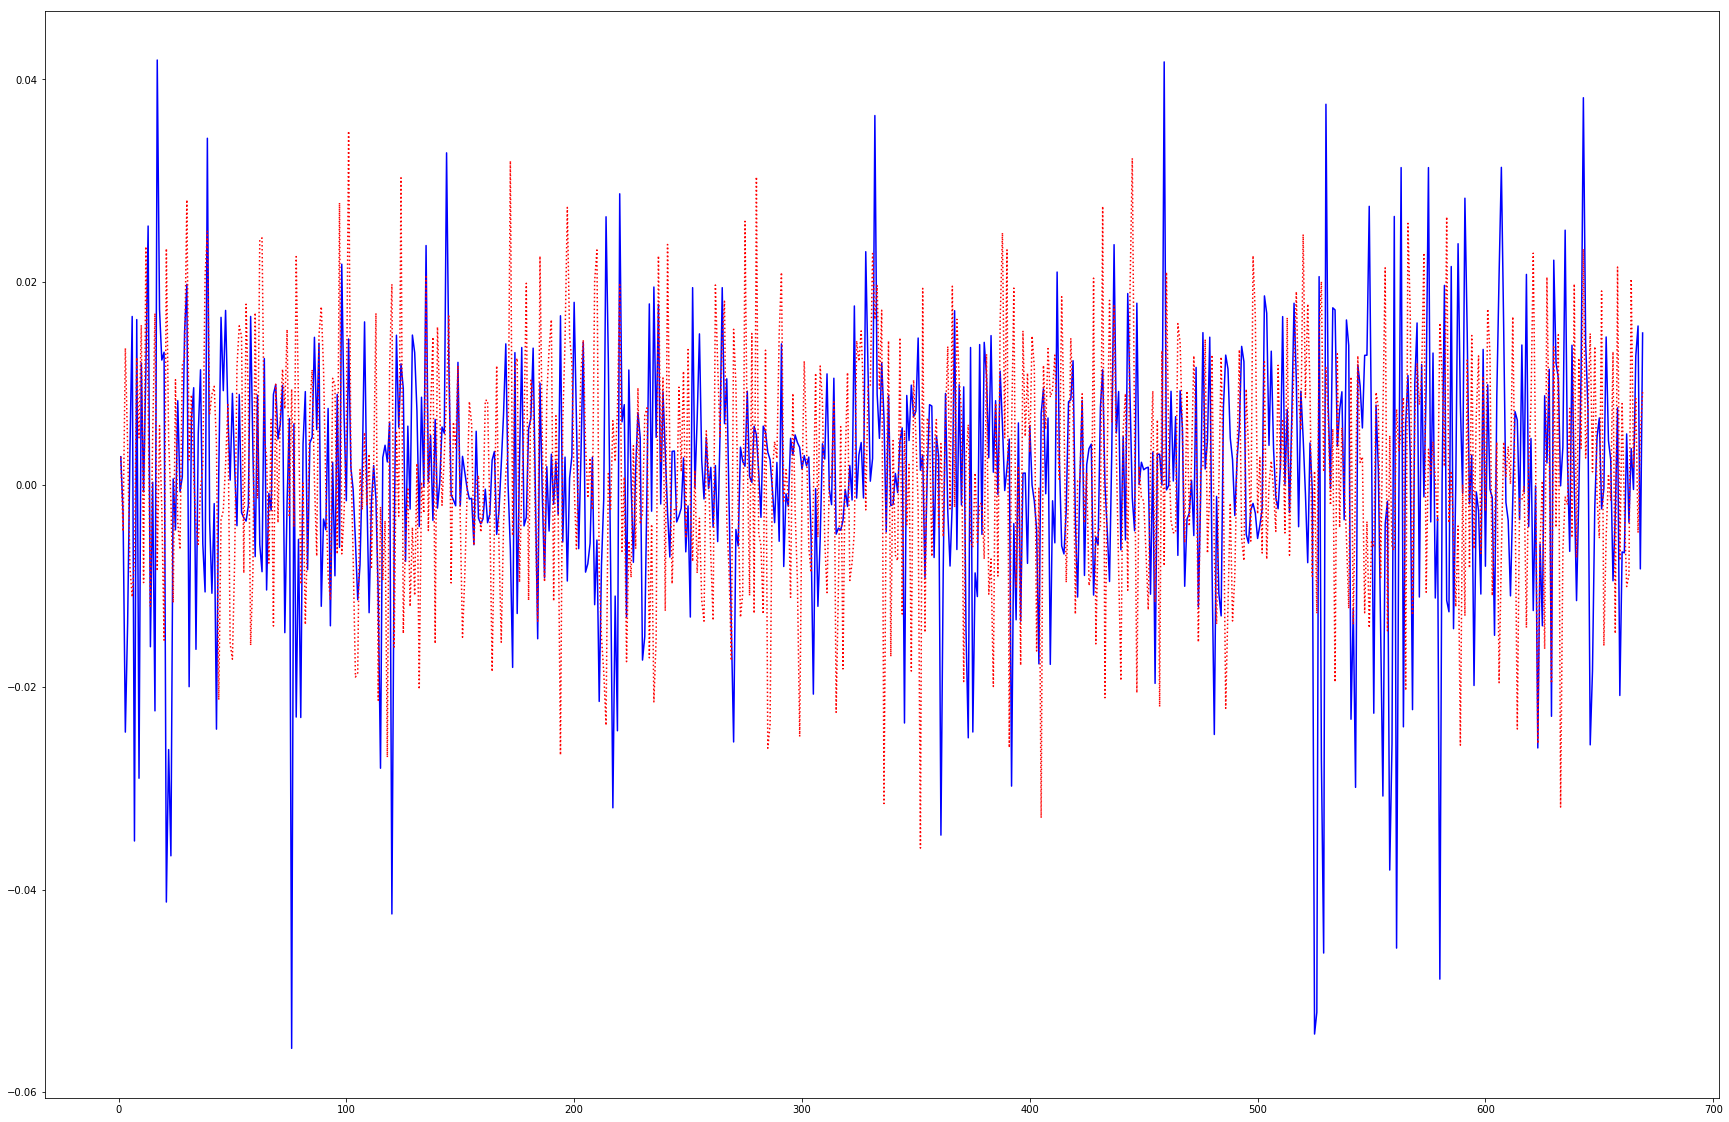

In [5]:
def GARCH(Y):
    mu=param0[0]
    omega= param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens= np.zeros(T)
    sigma2= np.zeros(T)
    F=np.zeros(T)
    v= np.zeros(T)
    sigma2[0]= omega/(1-alpha)
    
    for t in range(1,T):
        sigma2[t]= omega+alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        F[t]= Y[t]- mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t]= sigma2[t]
        GARCH_Dens[t]= (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])
    
    Likelihood= np.sum(GARCH_Dens[1:-1])
    return Likelihood


def GARCH_PROD(params, Y0, T):
    mu=params[0]
    omega= params[1]
    alpha = params[2]
    beta = params[3]
    Y= np.zeros(T)
    sigma2= np.zeros(T)
    Y[0]= Y0
    sigma2[0]= omega/(1-alpha)
    
    
    for t in range(1,T):
        sigma2[t]= omega+alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        Y[t]= mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        
    return Y

mu=df['Returns'].mean()
sig =df['Returns'].var()
#Y= np.random.normal(mu,sig,T)
param0 = np.array([mu,sig,0.05,0.01])
param_star= minimize(GARCH, param0, method= 'BFGS', options ={'xtol':1e-8, 'disp':True})
Y_GARCH= GARCH_PROD(param_star.x,Y[0],T)
timevec = np.linspace(1,T,T)
plt.figure(figsize=(30,20))
plt.plot(timevec, Y, 'b' , timevec, Y_GARCH,'r:')

In [6]:
rmse=np.sqrt(np.mean(((df['Returns'])- Y_GARCH )**2))

In [7]:
rmse

0.01749094468984514